<a href="https://colab.research.google.com/github/QuanRy/Machine_Learning/blob/main/lab_7/lab_7_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [2]:
# Загрузка данных
df = pd.read_csv("loan3000.csv", delimiter = ',')
df.head()

,Unnamed: 0,outcome,purpose_,dti,borrower_score,payment_inc_ratio
0,32109,paid off,debt_consolidation,21.23,0.40,5.11135
1,16982,default,credit_card,15.49,0.40,5.43165
2,25335,paid off,debt_consolidation,27.30,0.70,9.23003
3,34580,paid off,major_purchase,21.11,0.40,2.33482
4,14424,default,debt_consolidation,16.46,0.45,12.10320


In [3]:
# Удаление столбца id
df.drop(columns=['Unnamed: 0',	'purpose_'], inplace=True)

In [4]:
df.head()

,outcome,dti,borrower_score,payment_inc_ratio
0,paid off,21.23,0.40,5.11135
1,default,15.49,0.40,5.43165
2,paid off,27.30,0.70,9.23003
3,paid off,21.11,0.40,2.33482
4,default,16.46,0.45,12.10320


In [5]:
# Замена значений столбца sex
df['outcome'].replace({'paid off': 0, 'default' : 1}, inplace = True)
df.head()

,outcome,dti,borrower_score,payment_inc_ratio
0,0,21.23,0.40,5.11135
1,1,15.49,0.40,5.43165
2,0,27.30,0.70,9.23003
3,0,21.11,0.40,2.33482
4,1,16.46,0.45,12.10320


In [6]:
# Обработка пропущенных значений
df.replace(' ', np.nan, inplace=True)
df.dropna(inplace=True)

In [7]:
# Нормализация данных
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=['outcome']))

In [8]:
# Кластеризация методом k-means
def kmeans_f(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    return kmeans

In [9]:
# Вычисление индекса силуэта для каждого числа кластеров
def silhouette(X):
    silhouette_scores = []
    for n_clusters in range(2, 11):
        kmeans = kmeans_f(X, n_clusters)
        silhouette_scores.append(silhouette_score(X, kmeans.labels_))
    return silhouette_scores

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

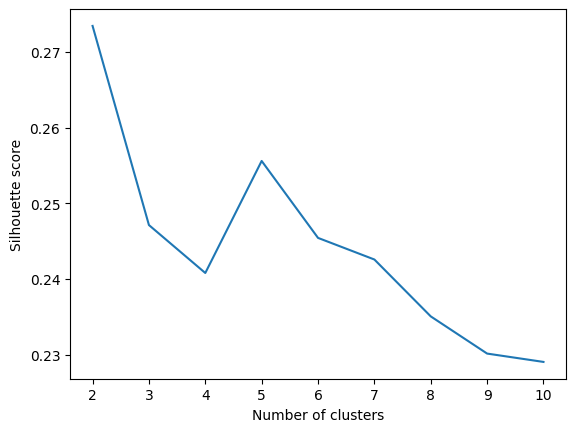

In [10]:
# Визуализация индекса силуэта в зависимости от числа кластеров
silhouette_scores = silhouette(X_scaled)
plt.plot(range(2, 11), silhouette_scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.show()

In [11]:
# Кластеризация методом k-means
n_clusters = 4
kmeans = kmeans_f(X_scaled, n_clusters)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [12]:
# Добавление меток кластеров в датафрейм 
df['cluster'] = kmeans.labels_

In [13]:
# Анализ кластеров
means = df.groupby(['cluster']).mean()
print(means)

          outcome        dti  borrower_score  payment_inc_ratio
cluster                                                        
0        0.559748  15.889921        0.508097          13.841871
1        0.605505  25.054495        0.436501           8.841833
2        0.515873  12.295648        0.414749           5.467126
3        0.280473  11.647609        0.635799           5.598591


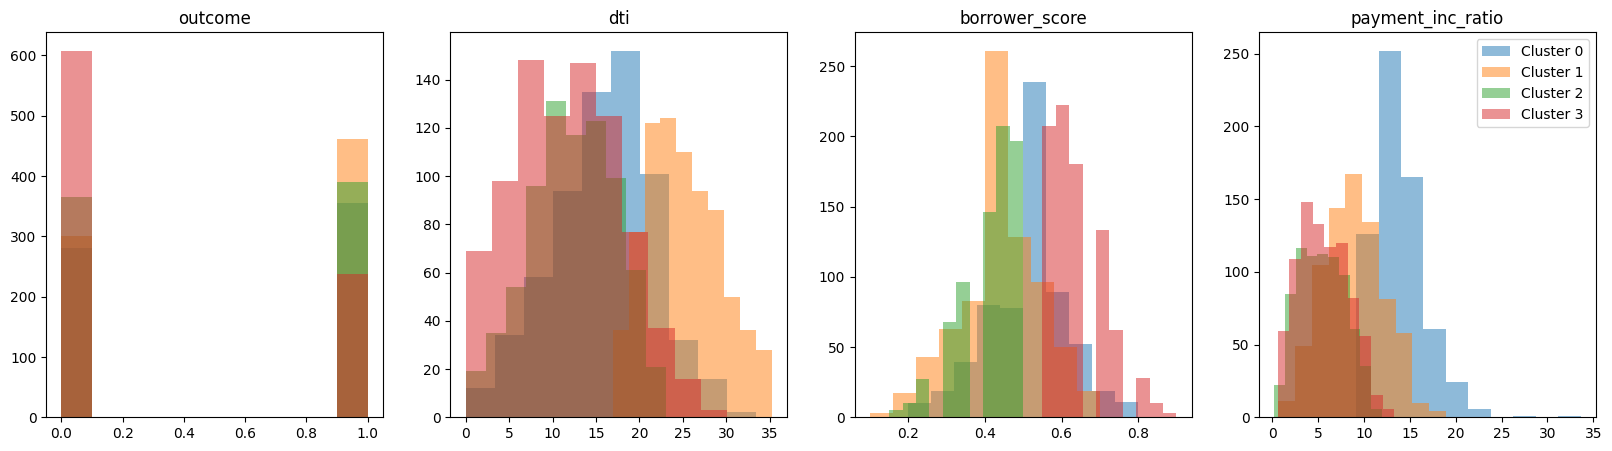

In [14]:
# График анализа кластеров
fig, ax = plt.subplots(1, len(df.columns)-1, figsize=(20,5))
for i, col in enumerate(df.columns[:-1]):
    for cluster in range(n_clusters):
        ax[i].hist(df[df['cluster'] == cluster][col], alpha=0.5, label=f'Cluster {cluster}')
        ax[i].set_title(col)
plt.legend()
plt.show()